# 1) Importar o DataSet

In [388]:
import pandas as pd
df = pd.read_csv("dataset.csv")

# 2)Analisar o DataSet

In [389]:
df.sample(4) #Primeira visao do data set

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria,custo
2201,masculino,solteiro,suburbana,29.2,sim,adulto_jovem,7877.4
898,feminino,solteiro,urbana,37.3,nao,adulto_senior,4159.5
1378,masculino,casado,suburbana,52.6,sim,jovem,19206.5
483,masculino,separado,urbana,37.4,nao,adulto_senior,8908.5


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genero           2215 non-null   object 
 1   estado_civil     2215 non-null   object 
 2   zona_residencia  2215 non-null   object 
 3   imc              2215 non-null   float64
 4   fumador          2215 non-null   object 
 5   class_etaria     2215 non-null   object 
 6   custo            2215 non-null   float64
dtypes: float64(2), object(5)
memory usage: 121.3+ KB


In [391]:
df.shape

(2215, 7)

In [392]:
df.describe() #Já é possivel imaginar possiveis outliers

,imc,custo
count,2215.000000,2215.000000
mean,30.704199,6045.710971
std,6.425918,8354.316703
min,3.400000,487.200000
25%,26.150000,2042.200000
50%,30.400000,4050.700000
75%,34.700000,7176.300000
max,83.100000,180544.400000


In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

BoxPlot -> Destaca os valores extremos (Outliers)

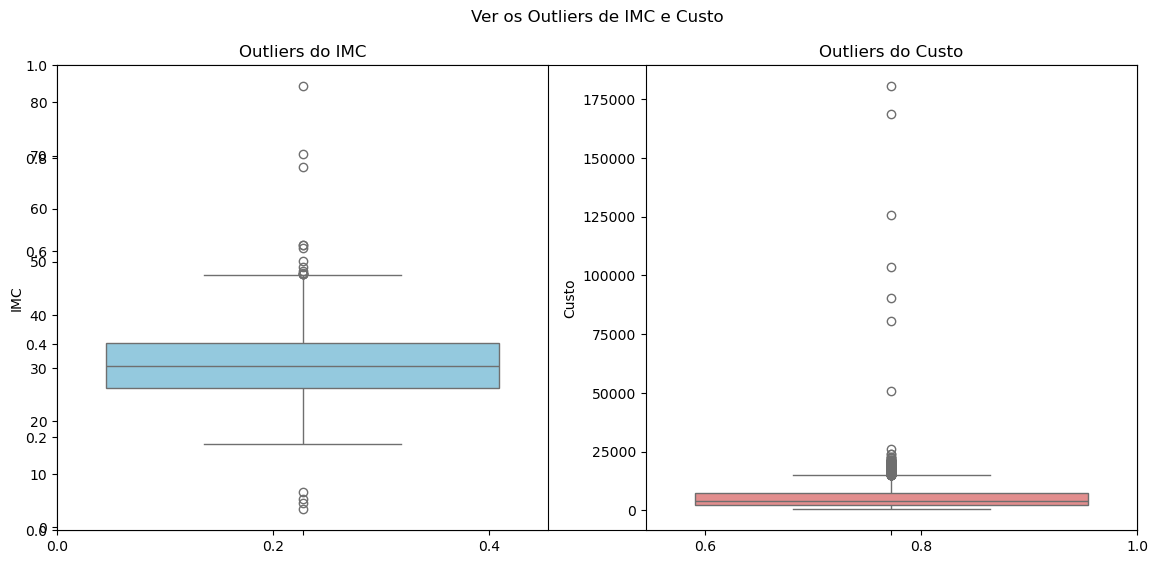

In [394]:
plt.figure(figsize=(12, 6))
plt.title("Ver os Outliers de IMC e Custo\n\n")

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='imc', color='skyblue')
plt.title('Outliers do IMC')
plt.ylabel('IMC')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='custo', color='lightcoral')
plt.title('Outliers do Custo')
plt.ylabel('Custo')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Histogramas -> Distribuiçao dos valores

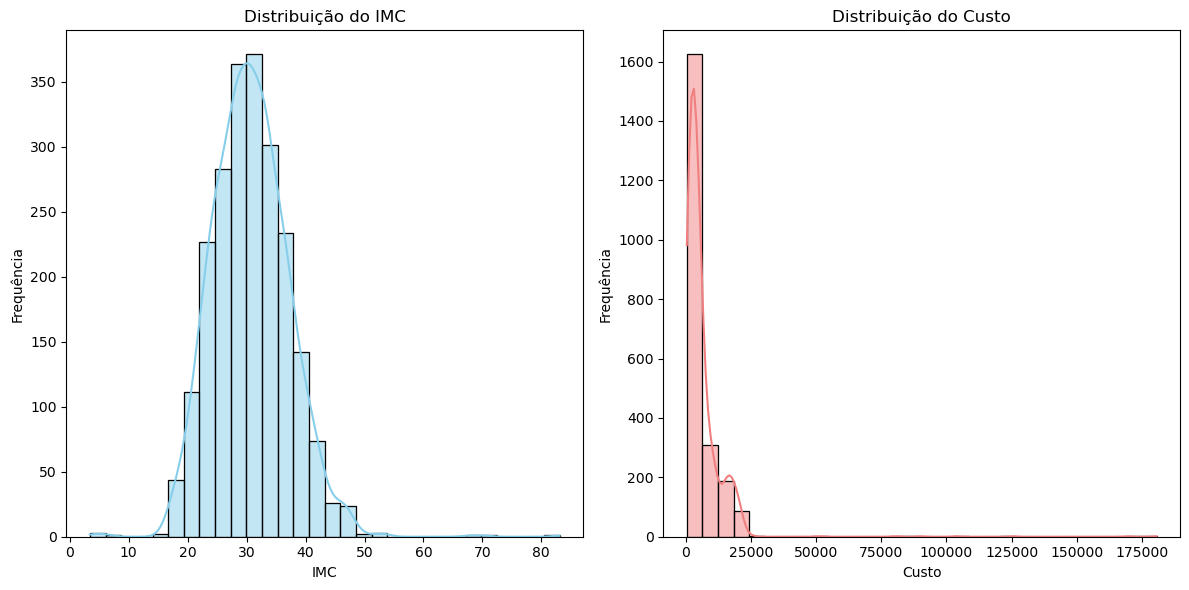

In [395]:
plt.figure(figsize=(12, 6))

# Histograma para 'imc'
plt.subplot(1, 2, 1)
sns.histplot(df['imc'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')

# Histograma para 'custo'
plt.subplot(1, 2, 2)
sns.histplot(df['custo'], bins=30, kde=True, color='lightcoral')
plt.title('Distribuição do Custo')
plt.xlabel('Custo')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Conclui-se que deve-se aplicar o método Tukey Fences ou método Z-score.

# 3) Pré-Processamento

In [396]:
print(df.isnull().sum())  # Verificar valores nulos
df.drop_duplicates(keep='first',inplace=True) #Eliminar valores duplicados caso existam

genero             0
estado_civil       0
zona_residencia    0
imc                0
fumador            0
class_etaria       0
custo              0
dtype: int64


Foi usado o metodo Tukey Fences pois apresentou menos outliers

In [397]:
# Calcular os quartis Q1 e Q3 para 'imc'
Q1_imc = df['imc'].quantile(0.25)
Q3_imc = df['imc'].quantile(0.75)

# Calcular o IQR (intervalo interquartil) para 'imc'
IQR_imc = Q3_imc - Q1_imc

# Fatores para os limites de Tukey Fences
fator_1_5 = 1.5  # Limites moderados (padrão)

# Limites de Tukey Fences para 'imc'
limite_inferior = Q1_imc - fator_1_5 * IQR_imc
limite_superior = Q3_imc + fator_1_5 * IQR_imc

# Exibir os limites calculados
print("Limite inferior (1.5 * IQR) para 'imc': ", limite_inferior)
print("Limite superior (1.5 * IQR) para 'imc': ", limite_superior)

Limite inferior (1.5 * IQR) para 'imc':  13.262499999999996
Limite superior (1.5 * IQR) para 'imc':  47.56250000000001


In [398]:
# outliers no 'imc'
outliers_imc = df[(df['imc'] < limite_inferior) | (df['imc'] > limite_superior)]

print("Quantidade de outliers em 'imc' a ser eliminada: ",outliers_imc.shape[0])
print(outliers_imc[['imc']]) 

Quantidade de outliers em 'imc' a ser eliminada:  18
       imc
320   67.8
355    4.6
564   47.7
711   47.6
727   83.1
755   50.2
762   53.2
936   48.3
1059   5.3
1083  47.6
1378  52.6
1494   6.7
1611  49.1
1739  47.9
1773  70.3
1823   3.4
2049  47.6
2092  53.1


In [399]:
# Filtrando o DataFrame para remover os outliers com base nos limites de Tukey Fences
df = df[(df['imc'] >= limite_inferior) & (df['imc'] <= limite_superior)]

<Axes: ylabel='imc'>

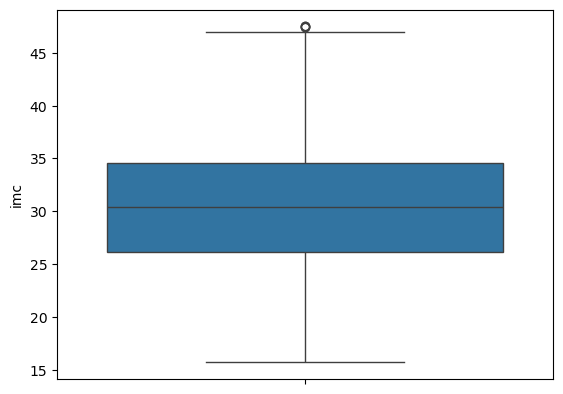

In [400]:
sns.boxplot(data=df['imc']) #Hum temos claramente muitos valores discrepantes (Outliers)

custo

In [401]:
Q1 = df['custo'].quantile(0.25)
Q3 = df['custo'].quantile(0.75)

IQR = Q3 - Q1

fator_07 = 1 #Aumentar Restriçao, para ajudar a remover mais valores extremos, o valor 1 parece o mais equilibrado

limite_inferior = Q1 - fator_07 * IQR
limite_superior = Q3 + fator_07 * IQR

# Exibir os novos limites
print(f"Limite inferior (1.5 * IQR): {limite_inferior}")
print(f"Limite superior (1.5 * IQR): {limite_superior}")

Limite inferior (1.5 * IQR): -3094.0249999999996
Limite superior (1.5 * IQR): 12337.675


In [402]:
# outliers no 'custo'
outliers_custo = df[(df['custo'] < limite_inferior) | (df['custo'] > limite_superior)]

print("Quantidade de outliers em 'custo' a ser eliminada: ",outliers_custo.shape[0])
print(outliers_custo[['custo']]) 

Quantidade de outliers em 'custo' a ser eliminada:  282
        custo
0     18213.9
5     14446.9
6     20404.7
11    18543.3
18    13854.3
...       ...
2142  18959.9
2154  20113.6
2166  17141.7
2181  18184.0
2195  18808.3

[282 rows x 1 columns]


In [403]:
# Eliminar os outliers de custo
df = df[(df['custo'] >= limite_inferior) & (df['custo'] <= limite_superior)]

In [404]:
df_ordenado_asc = df.sort_values(by='custo', ascending=False)
df_ordenado_des = df.sort_values(by='custo', ascending=True)
print(df_ordenado_asc['custo'].head(4)) # Novos valores mais altos
print(df_ordenado_des['custo'].head(4)) # Novos valores mais baixos

1124    12291.4
415     12291.3
37      12288.7
256     12285.0
Name: custo, dtype: float64
1842    487.2
215     487.3
2196    487.5
877     490.1
Name: custo, dtype: float64


<Axes: ylabel='custo'>

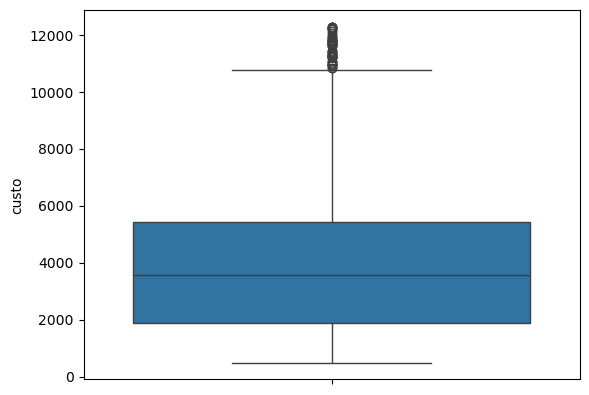

In [405]:
sns.boxplot(data=df['custo'])

Melhor visto que vamos aplicar o algoritmo SVM nao devemos ter valores extremos muito distantes.

In [406]:
df.shape

(1914, 7)

Perda de 13.6% do dataset original

# 4) Transformaçao

Tratar das variaveis categoricas

In [407]:
from sklearn.preprocessing import LabelEncoder
#estado civil
df_new = df.copy()

le = LabelEncoder()
# Estado Civil
le.fit(df_new.estado_civil.drop_duplicates()) 
df_new.estado_civil = le.transform(df_new.estado_civil)
# Fumador
le.fit(df_new.fumador.drop_duplicates()) 
df_new.fumador = le.transform(df_new.fumador)
# Regiao
le.fit(df_new.zona_residencia.drop_duplicates()) 
df_new.zona_residencia = le.transform(df_new.zona_residencia)
# Classe Etaria	
le.fit(df_new.class_etaria.drop_duplicates()) 
df_new.class_etaria = le.transform(df_new.class_etaria)
# Genero
le.fit(df_new.genero.drop_duplicates()) 
df_new.genero = le.transform(df_new.genero)

In [408]:
df_new.head()

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria,custo
1,0,1,2,39.3,0,3,4266.4
2,1,2,0,40.7,0,5,854.6
3,1,0,2,28.2,1,2,10169.7
4,0,2,2,31.1,0,3,4151.5
7,1,3,0,37.0,0,4,5501.2


In [409]:
correlacao = df_new.corr()

# Exibir a correlação das variáveis com o custo
correlacao_com_custo = correlacao['custo'].sort_values()

# Exibir os resultados
print(correlacao_com_custo)

estado_civil      -0.310375
imc               -0.071752
zona_residencia   -0.065451
genero            -0.028395
class_etaria       0.196297
fumador            0.545519
custo              1.000000
Name: custo, dtype: float64


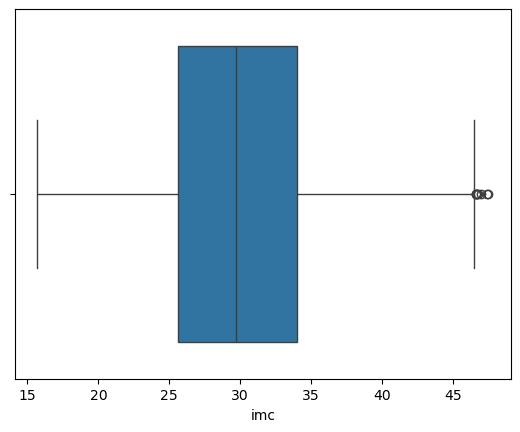

In [415]:
sns.boxplot(x=df_new['imc'])
plt.show()

In [410]:
df_new.describe()

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria,custo
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,0.490596,1.248171,1.256531,30.066562,0.096656,2.238245,4049.654180
std,0.500042,1.022261,0.822146,5.995733,0.295566,1.441916,2777.337593
min,0.000000,0.000000,0.000000,15.700000,0.000000,0.000000,487.200000
25%,0.000000,0.000000,1.000000,25.600000,0.000000,1.000000,1873.525000
50%,0.000000,2.000000,1.000000,29.700000,0.000000,2.000000,3548.850000
75%,1.000000,2.000000,2.000000,34.000000,0.000000,3.000000,5433.925000
max,1.000000,3.000000,2.000000,47.500000,1.000000,5.000000,12291.400000


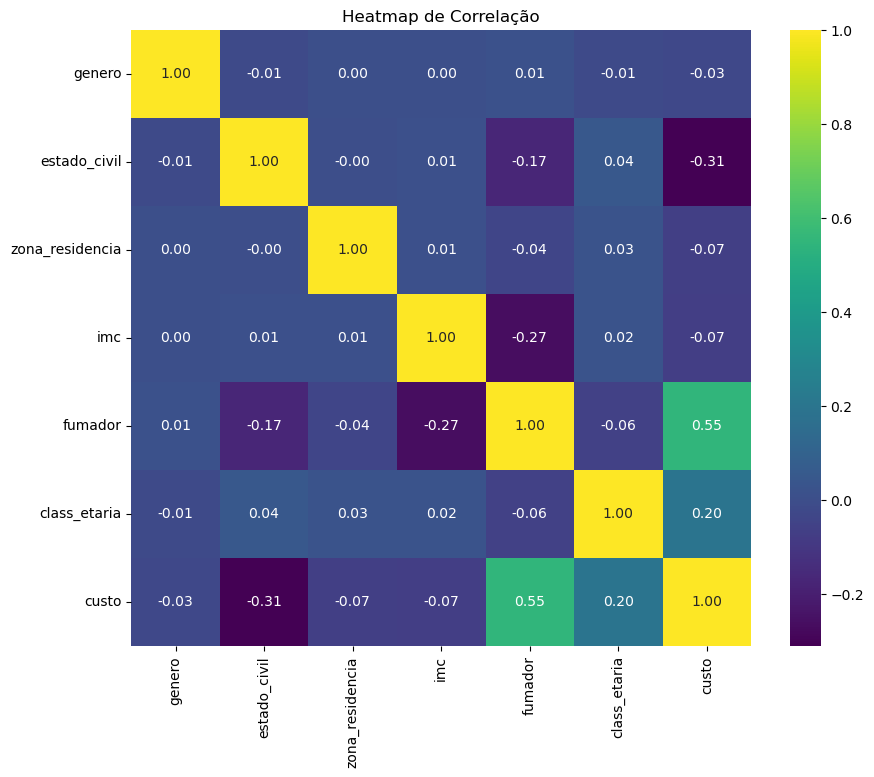

In [411]:
corr_matrix = df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Heatmap de Correlação")
plt.show()

In [412]:
X = df_new.drop('custo', axis=1)  # Substitua 'target' pelo nome da sua variável dependente
y = df_new['custo']  # Variável dependente

In [413]:
from sklearn.model_selection import train_test_split
Xtreino,Xteste,ytreino,yteste = train_test_split(X,y,test_size=0.2,random_state=12)

In [414]:
from sklearn.svm import SVR
modelo = SVR()
modelo.fit(Xtreino, ytreino) 
modelo.score(Xteste,yteste)

-0.03156442969495332

In [416]:
Xtreino

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria
1068,0,1,2,26.6,0,5
992,1,0,2,30.9,0,1
1283,1,0,2,24.5,0,2
1581,0,0,0,32.4,0,3
536,0,0,2,29.9,0,1
...,...,...,...,...,...,...
1471,0,0,1,23.7,0,2
1483,0,2,2,22.2,1,5
1641,0,1,1,27.8,1,2
1962,0,0,1,35.3,0,4
